In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Define the col names
colnames=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]
#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )
#Data
dataset.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
dataset.tail()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dataset=dataset.replace({"class": {"Irish-sentosa":1,"Irish-versicolor":2, "Irish-virginicia":3}})
dataset.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.tail()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
0                 False              False               False   
1                 False              False               False   
2                 False              False               False   
3                 False              False               False   
4                 False              False               False   
..                  ...                ...                 ...   
145               False              False               False   
146               False              False               False   
147               False              False               False   
148               False              False               False   
149               False              False               False   

     petal_width_in_cm  class  
0                False  False  
1                False  False  
2                False  False  
3                

Text(0.5, 1.0, 'correlation on irish classes')

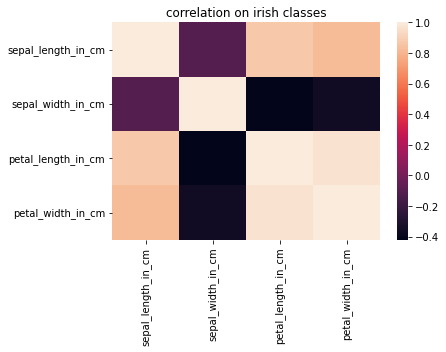

In [8]:
plt.figure(1)
sns.heatmap(dataset.corr())
plt.title('correlation on irish classes')

In [9]:
dataset.corr()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
sepal_length_in_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_in_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_in_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_in_cm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

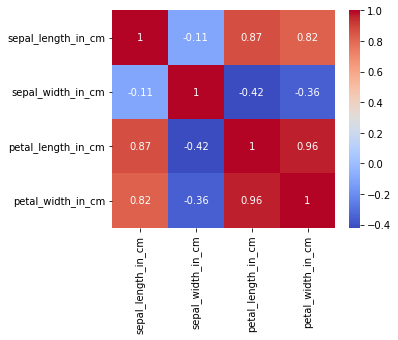

In [11]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [12]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25, random_state=0)

In [13]:
from sklearn.svm import SVC
classifier =SVC(kernel='linear', random_state=0)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
Y_trainp=classifier.predict(X_train)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy:98.18%
Standard Deviation:3.64%


In [19]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_train,Y_trainp)
print(cm1)
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

[[37  0  0]
 [ 0 32  2]
 [ 0  0 41]]
Accuracy:98.18%
Standard Deviation:3.64%
